In [4]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

sns.set(style="whitegrid",font_scale=2)
import matplotlib.collections as clt
import ptitprince as pt

def export_fig(axis,text, fname):
    if savefigs:
        axis.text()
        axis.savefig(fname, bbox_inches='tight')

In [37]:
## Set these for each figure

measureType = "GazeObject" # GazeObject, PupilDiameter
xAxis= "Cue" #Specify the name of your x axis, this should matach the df
#yAxis = "Pupil Diameter (mms)" #specify the name of your y axis, this should match the df
yAxis = "Fixations" #might have to rename the actual csv column name
zAxis = "Phase"
version  = "ExtLong_Recoded_phaseav_2204" 
savefigs = True

In [38]:
path = "/Users/dhewitt/Data/pps/Exports/"
fileType = ".csv"
fileName = ("GrandAvExport_" + measureType + version + fileType)
print(fileName)
figs_dir = (path + 'figs/')

if savefigs:
    # Make the figures folder if it doesn't yet exist
    if not os.path.isdir(figs_dir):
        os.makedirs(figs_dir)

GrandAvExport_GazeObjectExtLong_Recoded_phaseav_2204.csv


As first step, load the dataset

In [39]:
print(fileName)
df = pd.read_csv(path + measureType + "/" + fileName)
df = df.groupby(['ID', 'Phase', 'Cue', 'Block']).mean().reset_index() #averaging because of repetitions which have the same predicted value
#df = df.groupby(['ID', 'Phase', 'Cue', 'Condition']).mean().reset_index() #averaging because of repetitions which have the same predicted value
df

GrandAvExport_GazeObjectExtLong_Recoded_phaseav_2204.csv


,ID,Phase,Cue,Block,Rep,Fixations,B1,Congruency
0,2,1,Neutral,Conditioning,1.5,0.086521,2.0,0.0
1,2,1,Neutral,Extinction,1.5,0.075681,2.0,0.0
2,2,1,Pain,Conditioning,1.5,0.043958,2.0,1.5
3,2,1,Pain,Extinction,1.5,0.098576,2.0,1.5
4,3,1,Neutral,Conditioning,1.5,0.092667,1.0,0.0
...,...,...,...,...,...,...,...,...
99,29,1,Pain,Extinction,1.5,0.429828,1.0,1.5
100,30,1,Neutral,Conditioning,1.5,0.092428,2.0,0.0
101,30,1,Neutral,Extinction,1.5,0.105705,2.0,0.0
102,30,1,Pain,Conditioning,1.5,0.271615,2.0,1.5


In [40]:
figSize = 3
timesSmaller = 8/figSize
#lW = 2.66/timesSmaller #indiivdual datapoint line width
lW = 2.4/timesSmaller #indiivdual datapoint line width
dotsize = 8/timesSmaller #indiv data point dot size
#eW = 3.57/timesSmaller #bar chart line width
eW = 1.6/timesSmaller #bar chart line width
spineW = 1/timesSmaller
sns.set(style="white",font_scale=2.8/timesSmaller)
boxWidth = 0.65/timesSmaller
violinWidth = 1.5/timesSmaller
ort="v"; 
sigma = .15

In [41]:
pal = "Set2"
#pal = sns.color_palette('vlag',4)
#pal = sns.color_palette(n_colors=8)
#pal = sns.color_palette('muted',8)
#pal = sns.color_palette('magma',4)
#pal = sns.color_palette('Spectral',4)

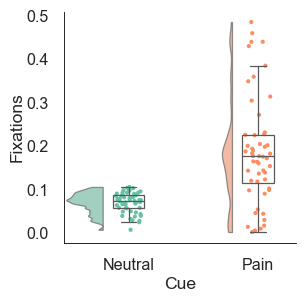

In [44]:
# Main effects of cue

#f, ax = plt.subplots(figsize=(7, 7))
#f, ax = plt.subplots(figsize=(figSize*1.3, figSize)) # for a flatter, wider chart
f, ax = plt.subplots(figsize=(figSize, figSize)) # for a squarer chart

ax=pt.RainCloud(x = xAxis, y = yAxis, data = df, palette = pal, bw = sigma,
                 width_viol = violinWidth, ax = ax, point_size = dotsize, linewidth = lW,
                orient = ort , box_showfliers = False,
                alpha = .65,  dodge = True, width_box = boxWidth,
               box_linewidth = lW, box_whiskerprops = dict(linewidth=lW))

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_color('Black')
ax.spines['bottom'].set_linewidth(eW)
ax.spines['left'].set_color('Black')
ax.spines['left'].set_linewidth(eW)
ax.tick_params(axis='both', which='both', pad=5) #change pad to make the axes labels further/closer to axis
ax.xaxis.labelpad = 3 # space between axis label and data name
ax.yaxis.labelpad = 1

#plt.title("Figure P15\n Adjusting Raincloud Alpha Level")
if savefigs:
    plt.savefig(figs_dir + fileName +"_fig2sized.svg", format='svg', dpi=1200, bbox_inches='tight')

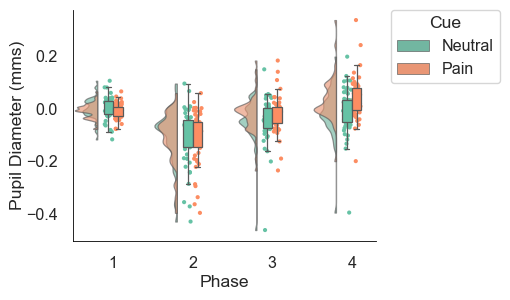

In [36]:
#Phase Interactions

#f, ax = plt.subplots(figsize=(7, 7))
f, ax = plt.subplots(figsize=(figSize*1.3, figSize)) # for a flatter, wider chart
#f, ax = plt.subplots(figsize=(figSize, figSize)) # for a squarer chart

ax=pt.RainCloud(x = zAxis, y = yAxis, hue = xAxis, data = df, palette = pal, bw = sigma,
                 width_viol = violinWidth, ax = ax, point_size = dotsize, linewidth = lW,
                orient = ort , box_showfliers = False,
                alpha = .65,  dodge = True, width_box = boxWidth,
               box_linewidth = lW, box_whiskerprops = dict(linewidth=lW))

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_color('Black')
ax.spines['bottom'].set_linewidth(eW)
ax.spines['left'].set_color('Black')
ax.spines['left'].set_linewidth(eW)
ax.tick_params(axis='both', which='both', pad=5) #change pad to make the axes labels further/closer to axis
ax.xaxis.labelpad = 3 # space between axis label and data name
ax.yaxis.labelpad = 1

#plt.title("Figure P15\n Adjusting Raincloud Alpha Level")
if savefigs:
    plt.savefig(figs_dir + fileName +"_fig2sized.svg", format='svg', dpi=1200, bbox_inches='tight')

## stop here

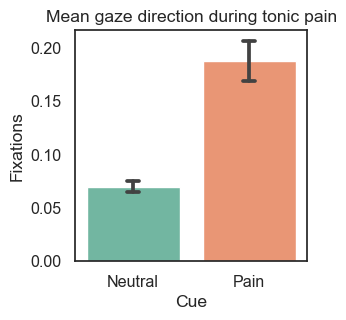

In [605]:
#f, ax = plt.subplots(figsize=(figSize*1.60, figSize)) # for a flatter, wider chart
f, ax = plt.subplots(figsize=(figSize, figSize)) # for a squarer chart

sns.barplot(x = xAxis, y = yAxis, data = df, capsize= .1, palette = pal)
#sns.barplot(x = "Condition", y = "Fixations", data = df, capsize= .1, order = ['Lcongruent', 'Lincongruent','Rcongruent','Rincongruent'])
plt.title("Mean gaze direction during tonic pain")

if savefigs:
    plt.savefig(figs_dir + fileName +"_fig1.svg", format='svg', dpi=1200, bbox_inches='tight')

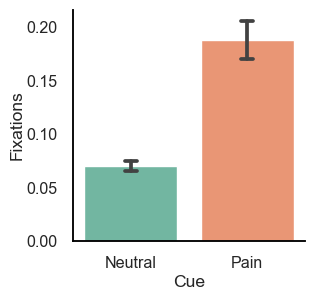

In [606]:
#f, ax = plt.subplots(figsize=(figSize*1.60, figSize)) # for a flatter, wider chart
f, ax = plt.subplots(figsize=(figSize, figSize)) # for a squarer chart

sns.barplot(x = xAxis, y = yAxis, data = df, capsize= .1, palette = pal)
#sns.barplot(x = "Condition", y = "Fixations", data = df, capsize= .1, order = ['Lcongruent', 'Lincongruent','Rcongruent','Rincongruent'])
#plt.title("Mean gaze direction during tonic pain")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_color('Black')
ax.spines['bottom'].set_linewidth(eW)
ax.spines['left'].set_color('Black')
ax.spines['left'].set_linewidth(eW)
ax.tick_params(axis='both', which='both', pad=5) #change pad to make the axes labels further/closer to axis
ax.xaxis.labelpad = 3 # space between axis label and data name
ax.yaxis.labelpad = 1

if savefigs:
    plt.savefig(figs_dir + fileName +"_fig1sized.svg", format='svg', dpi=1200, bbox_inches='tight')

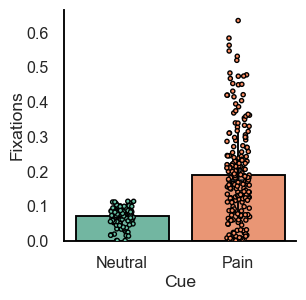

In [607]:
#f, ax = plt.subplots(figsize=(figSize*1.60, figSize)) # for a flatter, wider chart
f, ax = plt.subplots(figsize=(figSize, figSize)) # for a squarer chart

sns.barplot(x = xAxis, y = yAxis, data = df, capsize= .1, palette = pal)
#sns.barplot(x = "Condition", y = "Fixations", data = df, capsize= .1, order = ['Lcongruent', 'Lincongruent','Rcongruent','Rincongruent'])
#plt.title("Mean gaze direction during tonic pain")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_color('Black')
ax.spines['bottom'].set_linewidth(eW)
ax.spines['left'].set_color('Black')
ax.spines['left'].set_linewidth(eW)
ax.tick_params(axis='both', which='both', pad=5) #change pad to make the axes labels further/closer to axis
ax.xaxis.labelpad = 3 # space between axis label and data name
ax.yaxis.labelpad = 1

# Draw the bar chart
ax = sns.barplot( data=df, x= xAxis,  y= yAxis, 
                 errcolor="black", edgecolor="black", linewidth=eW,palette=pal, 
                 ci='sd', errwidth = eW)

# Draw the individual data points
sns.stripplot(data=df, x= xAxis, y= yAxis,  
              edgecolor="black", palette=pal, 
              linewidth=lW, size = dotsize)

if savefigs:
    plt.savefig(figs_dir + fileName +"_fig1sized_withindivs.svg", format='svg', dpi=1200, bbox_inches='tight')

This plot can give the reader a first idea of the dataset: which group has bigger mean value, whether this difference is likely to be significant or not.
Only the mean of each group score and the standard deviation is visualized in this plot. 


To have an idea of the distribution of our dataset we can plot a "cloud", a smoothed version of the histogram:

This gives a good idea of the distribution of the data points, but the median and the quartiles are not obvious, making it hard to determine statistical differences at a glance. Hence we add an "empty" boxplot to show median, quartiles and outliers:

The 'move' parameter can be used to shift the rain below the boxplot, giving better visibility of the raw data in some instances: 

Further, the raincloud function works equally well with a list or np.array, if you prefer to use those instead of a dataframe input: 

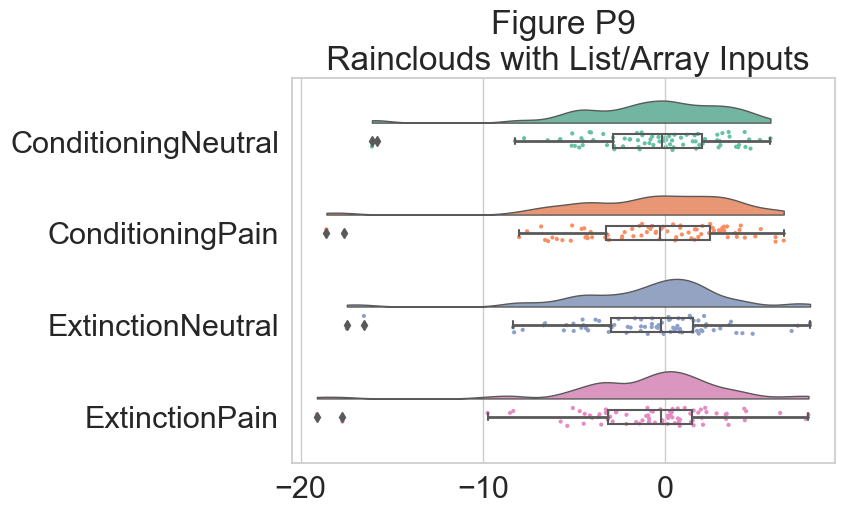

In [14]:
# Usage with a list/np.array input
dx = list(df["Condition"]); dy = list(df["Direction"])
f, ax = plt.subplots(figsize=(7, 5))

ax=pt.RainCloud(x = dx, y = dy, palette = pal, bw = sigma,
                 width_viol = .6, ax = ax, orient = ort, order = ['ConditioningNeutral','ConditioningPain','ExtinctionNeutral','ExtinctionPain'])

plt.title("Figure P9\n Rainclouds with List/Array Inputs")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP09.png', bbox_inches='tight')

For some data, you may want to flip the orientation of the raincloud to a 'petit prince' plot. You can do this with the 'orient' flag in the pt.RainCloud Function:

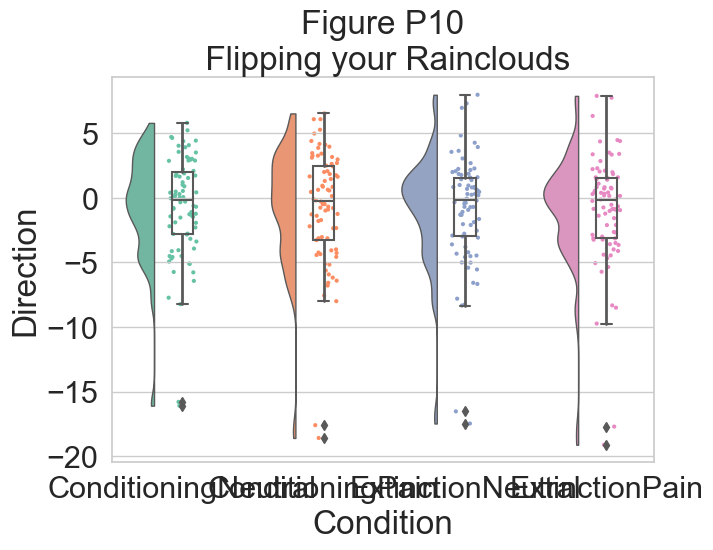

In [15]:
# Changing orientation
dx="Condition"; dy="Direction"; ort="v"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(7, 5))

ax=pt.RainCloud(x = dx, y = dy, data = df, palette = pal, bw = sigma,
                 width_viol = .5, ax = ax, orient = ort, order = ['ConditioningNeutral','ConditioningPain','ExtinctionNeutral','ExtinctionPain'])

plt.title("Figure P10\n Flipping your Rainclouds")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP10.png', bbox_inches='tight')

You can also change the smoothing kernel used to generate the probability distribution function of the data. To do this, you  adjust the sigma parameter: 

ValueError: Could not interpret input 'diameter'

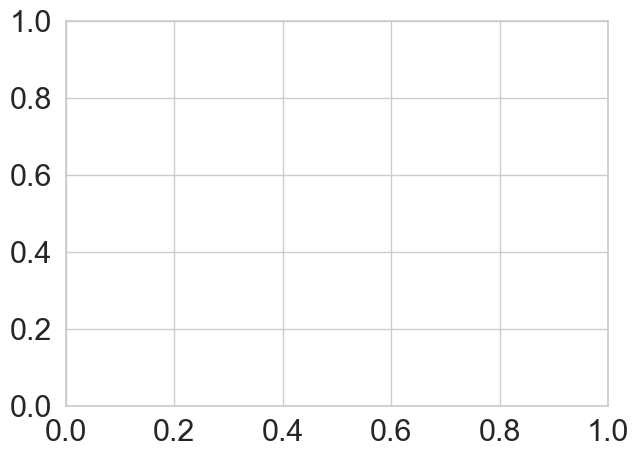

In [16]:
#changing cloud smoothness
dx="condition"; dy="diameter"; ort="h"; pal = "Set2"; sigma = .05
f, ax = plt.subplots(figsize=(7, 5))

ax=pt.RainCloud(x = dx, y = dy, data = df, palette = pal, bw = sigma,
                 width_viol = .6, ax = ax, orient = ort)

plt.title("Figure P11\n Customizing Raincloud Smoothness")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP11.png', bbox_inches='tight')

Finally, using the pointplot flag you can add a line connecting group mean values. This can be useful for more complex datasets, for example repeated measures or factorial data. Below we illustrate a few different approaches to plotting such data using rainclouds, by changing the hue, opacity, or dodge element of the individual plots:  

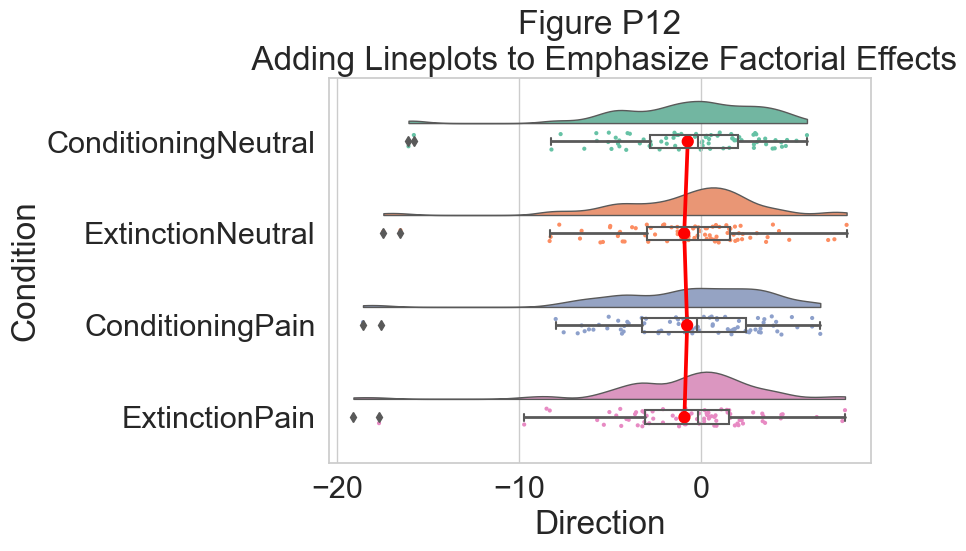

In [17]:
#adding a red line connecting the groups' mean value (useful for longitudinal data)
dx="Condition"; dy="Direction"; ort="h"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(7, 5))

ax=pt.RainCloud(x = dx, y = dy, data = df, palette = pal, bw = sigma,
                 width_viol = .6, ax = ax, orient = ort,
               pointplot = True)

plt.title("Figure P12\n Adding Lineplots to Emphasize Factorial Effects")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP12.png', bbox_inches='tight')

Another flexible option is to use Facet Grids to separate different groups or factor levels, illustrated below: 

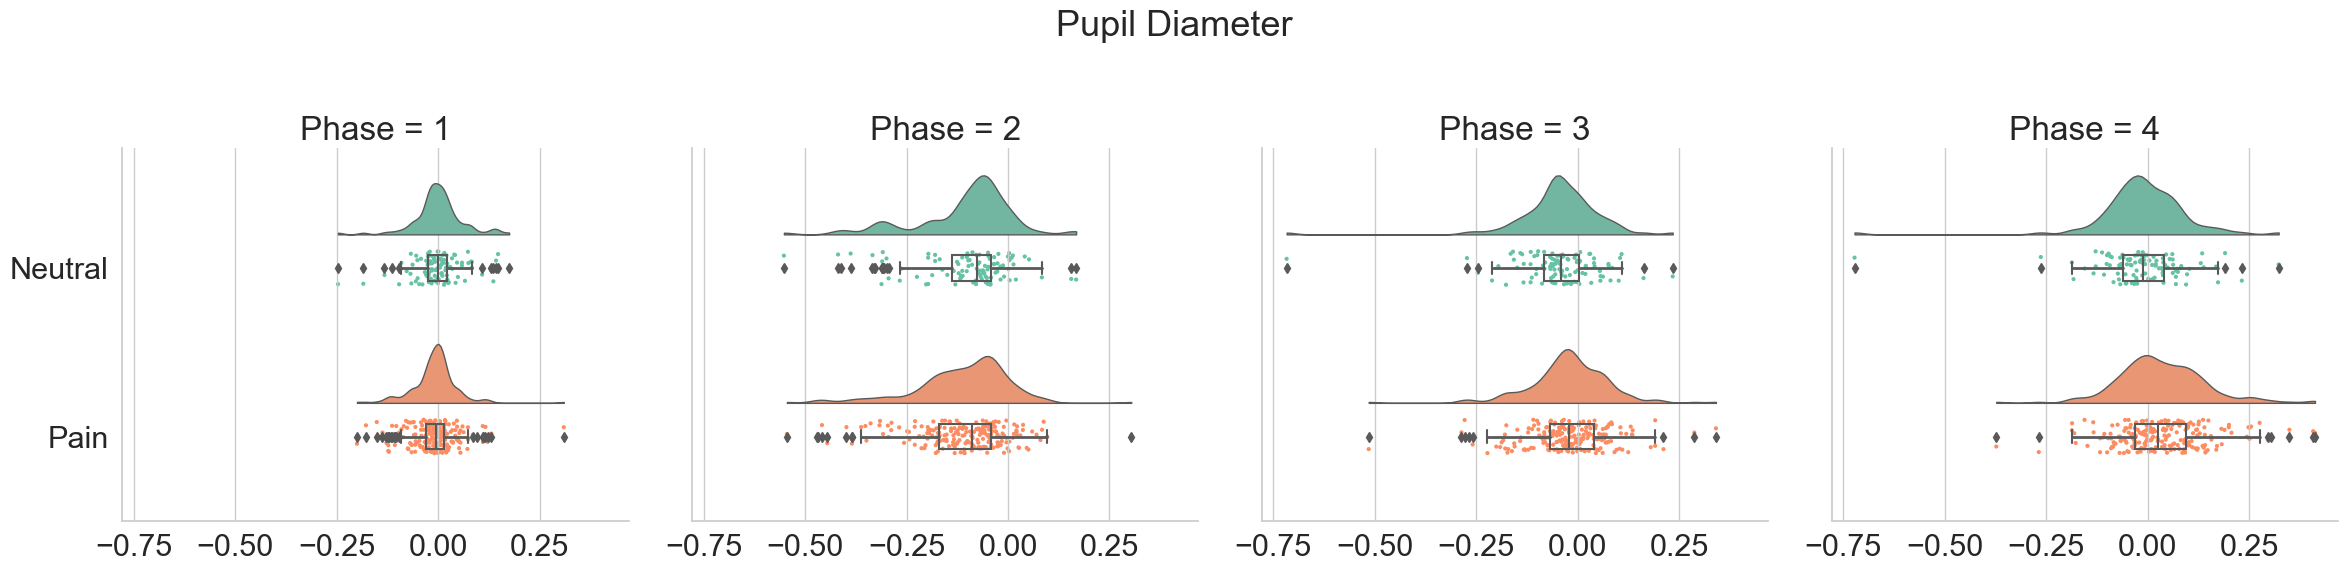

In [28]:
# Rainclouds with FacetGrid
#g = sns.FacetGrid(df, col = "phase", height = 6)
#g = g.map_dataframe(pt.RainCloud, x = "condition", y = "diameter", data = df,
#                    orient = "h")

g = sns.FacetGrid(df, col = "Phase", height = 6)
g = g.map_dataframe(pt.RainCloud, x = "Side", y = "Measure", data = df,
                    orient = "h")


g.fig.subplots_adjust(top=0.75)
g.fig.suptitle("Pupil Diameter",  fontsize=26)
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP13.png', bbox_inches='tight')

As an alternative, it is possible to use the hue input for plotting different sub-groups directly over one another, facilitating their comparison:  

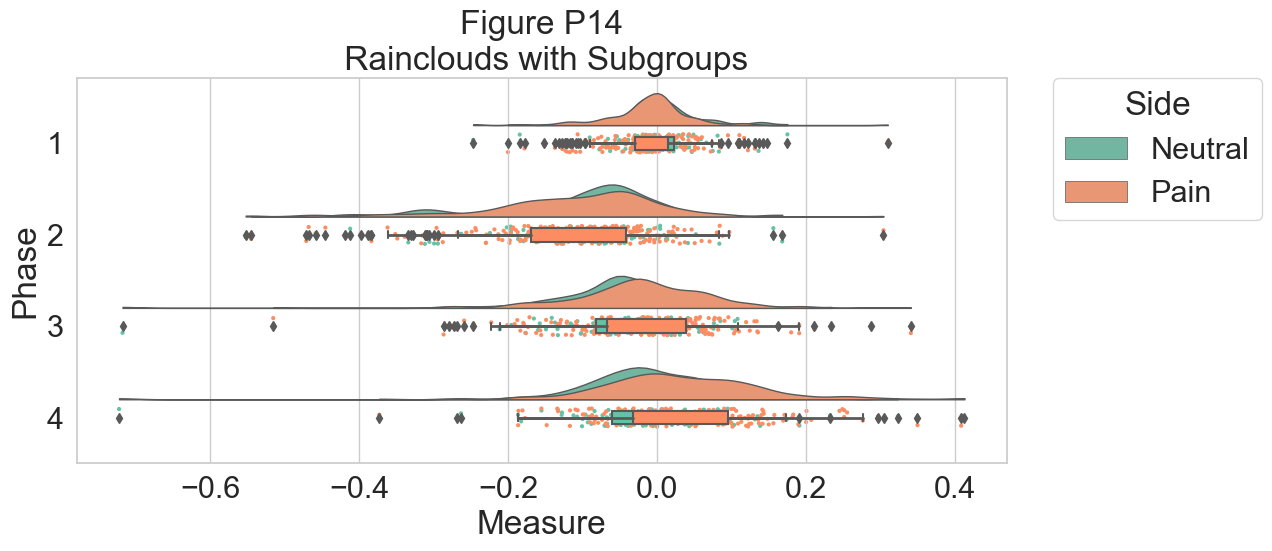

In [30]:
# Hue Input for Subgroups
dx="Phase"; dy="Measure"; dhue = "Side"; ort="h"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(12, 5))


ax=pt.RainCloud(x = dx, y = dy, hue = dhue, data = df, palette = pal, bw = sigma,
                 width_viol = .7, ax = ax, orient = ort)

plt.title("Figure P14\n Rainclouds with Subgroups")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP14.png', bbox_inches='tight')

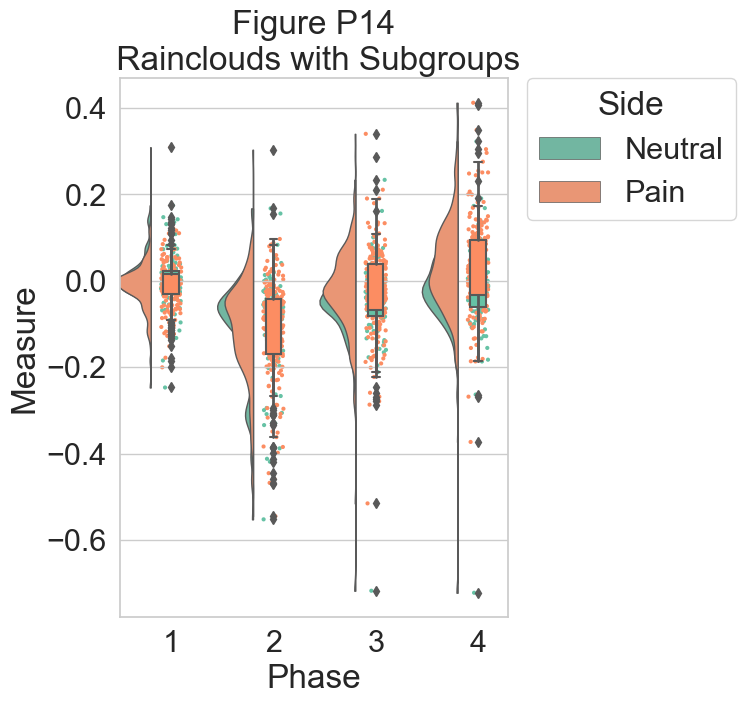

In [31]:
# Hue Input for Subgroups



dx="Phase"; dy="Measure"; dhue = "Side"; ort="v"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(5, 7))

ax=pt.RainCloud(x = dx, y = dy, hue = dhue, data = df, palette = pal, bw = sigma,
                 width_viol = .7, ax = ax, orient = ort)

plt.title("Figure P14\n Rainclouds with Subgroups")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP14.png', bbox_inches='tight')

To improve the readability of this plot, we adjust the alpha-level using the associated flag (0-1 alpha intensity): 

Rather than letting the two boxplots obscure one another, we can set the dodge flag to true, adding interpretability: 

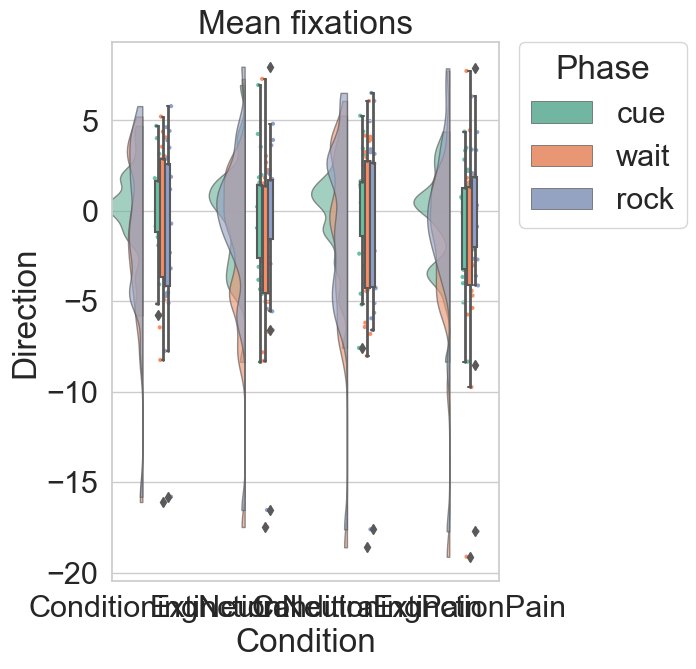

In [23]:
#The Doge Flag
f, ax = plt.subplots(figsize=(5, 7))

ax=pt.RainCloud(x = dx, y = dy, hue = dhue, data = df, palette = pal, bw = sigma,
                 width_viol = .7, ax = ax, orient = ort , alpha = .65, dodge = True)

plt.title("Mean fixations")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP16.png', bbox_inches='tight')

Finally, we may want to add a traditional line-plot to our graph to aid in the detection of factorial main effects and interactions. As an example, we've plotted the mean within each boxplot:

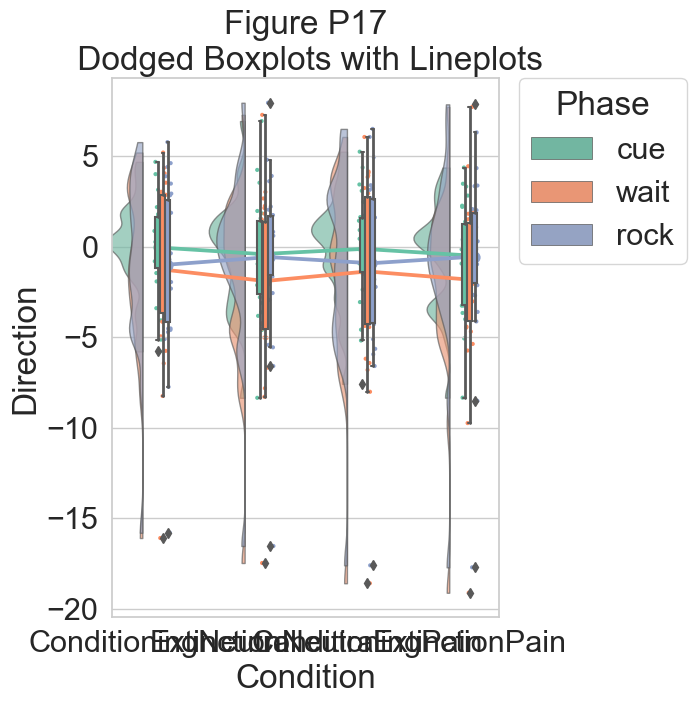

In [24]:
#same, with dodging and line
f, ax = plt.subplots(figsize=(5, 7))
ax=pt.RainCloud(x = dx, y = dy, hue = dhue, data = df, palette = pal, bw = sigma, width_viol = .7,
                ax = ax, orient = ort , alpha = .65, dodge = True, pointplot = True)

plt.title("Figure P17\n Dodged Boxplots with Lineplots")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP17.png', bbox_inches='tight')

Here is the same plot, but now with the individual observations moved below the boxplots again using the 'move' parameter:

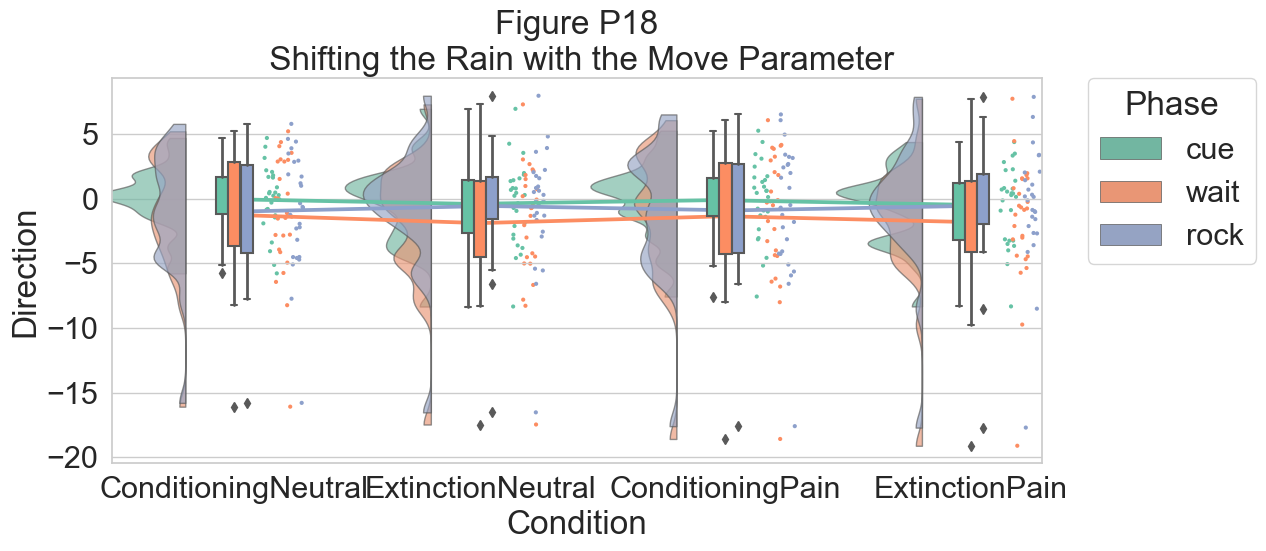

In [25]:
#moving the rain under the boxplot
f, ax = plt.subplots(figsize=(12, 5))

ax=pt.RainCloud(x = dx, y = dy, hue = dhue, data = df, palette = pal, bw = sigma, width_viol = .7,
                ax = ax, orient = ort , alpha = .65, dodge = True, pointplot = True, move = .2)

plt.title("Figure P18\n Shifting the Rain with the Move Parameter")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP18.png', bbox_inches='tight')

As our last example, we'll consider a complex repeated measures design with two groups and three timepoints. The goal is to illustrate our complex interactions and main-effects, while perserving the transparent nature of the raincloud plot: 

In [26]:
# Load in the repeated data
df_rep = pd.read_csv ("repeated_measures_data.csv", sep= ",")
df_rep.columns = ["score",  "timepoint", "group"]
df_rep.head()

FileNotFoundError: [Errno 2] No such file or directory: 'repeated_measures_data.csv'

NameError: name 'df_rep' is not defined

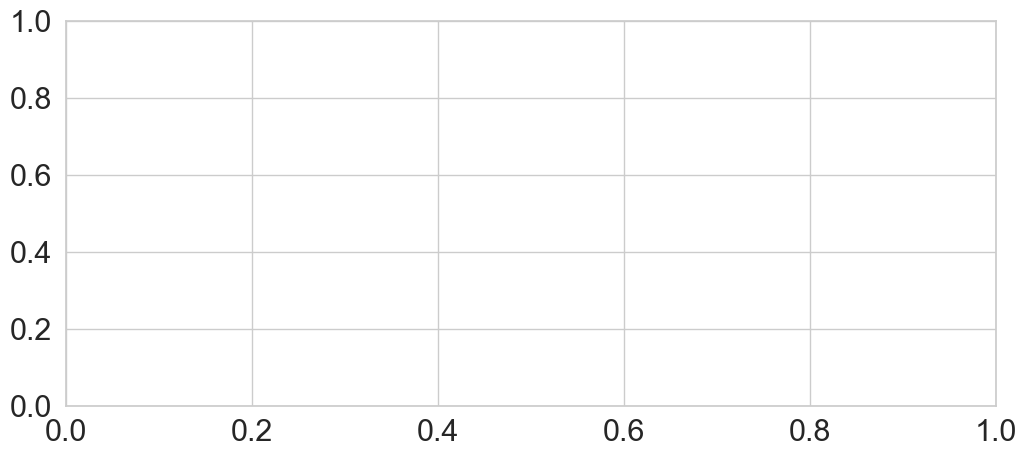

In [13]:
# Plot the repeated measures data
dx = "group"; dy = "score"; dhue = "timepoint"; ort = "h"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(12, 5))

ax=pt.RainCloud(x = dx, y = dy, hue = dhue, data = df_rep, palette = pal, bw = sigma, width_viol = .7,
                ax = ax, orient = ort , alpha = .65, dodge = True, pointplot = True, move = .2)

plt.title("Figure P19\n Repeated Measures Data - Example 1")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP19.png', bbox_inches='tight')

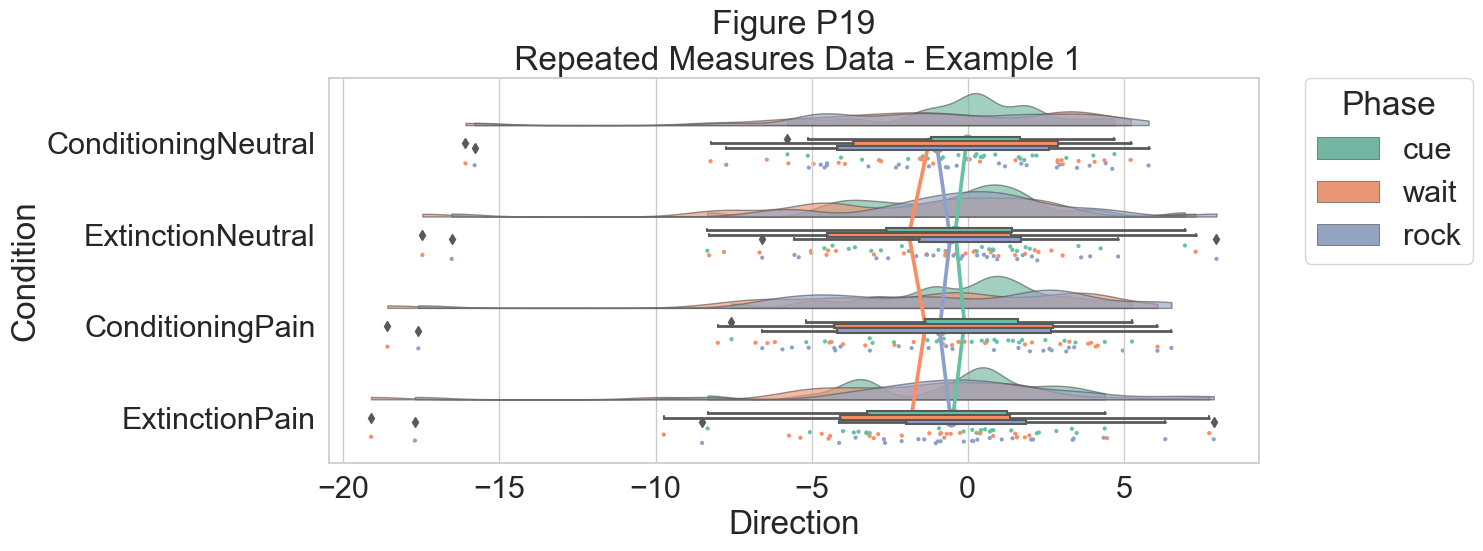

In [28]:
# Plot the repeated measures data

dx = "Condition"; dy = "Direction"; dhue = "Phase"; ort = "h"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(12, 5))

ax=pt.RainCloud(x = dx, y = dy, hue = dhue, data = df, palette = pal, bw = sigma, width_viol = .7,
                ax = ax, orient = ort , alpha = .65, dodge = True, pointplot = True, move = .2)

plt.title("Figure P19\n Repeated Measures Data - Example 1")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP19.png', bbox_inches='tight')

The function is flexible enough that you can flip the ordering of the factors around simply by changing which variable informs the hue parameter: 

NameError: name 'df_rep' is not defined

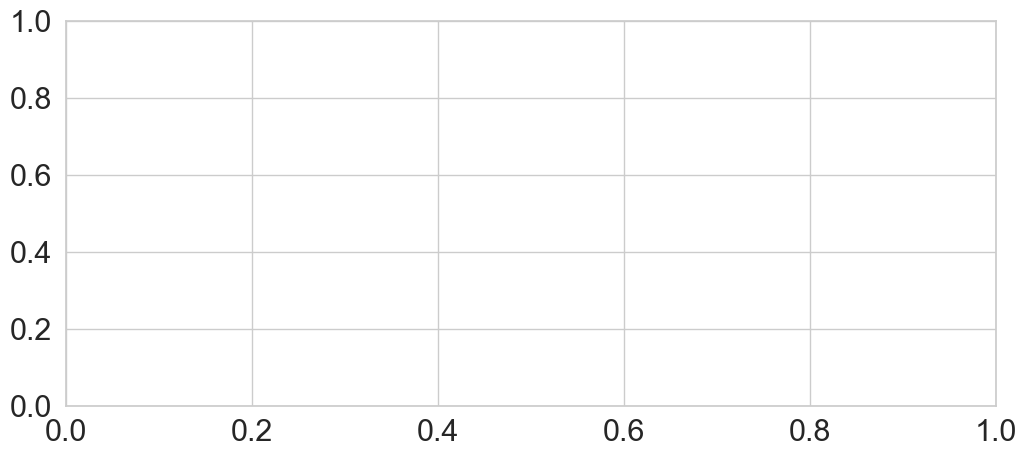

In [29]:
# Now with the group as hue
dx = "timepoint"; dy = "score"; dhue = "group"
f, ax = plt.subplots(figsize=(12, 5))

ax=pt.RainCloud(x = dx, y = dy, hue = dhue, data = df_rep, palette = pal, bw = sigma, width_viol = .7,
                ax = ax, orient = ort , alpha = .65, dodge = True, pointplot = True, move = .2, )

plt.title("Figure P20\n  Repeated Measures Data - Example 2")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP20.png', bbox_inches='tight')

In [30]:
df_rep = pd.read_csv("/Users/dhewitt/Data/pps/GrandAvExportLong.csv")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/dhewitt/Data/pps/GrandAvExportLong.csv'

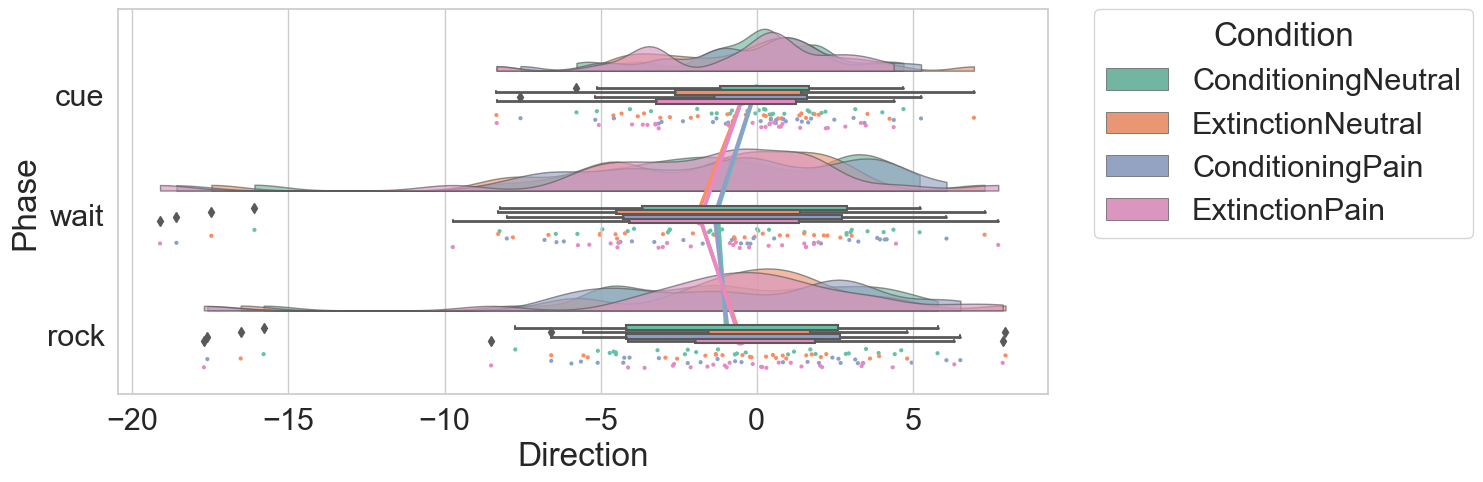

In [31]:
dx = "Phase"; dy = "Direction"; dhue = "Condition"; ort = "h"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(12, 5))

ax=pt.RainCloud(x = dx, y = dy, hue = dhue, data = df, palette = pal, bw = sigma, width_viol = .7,
                ax = ax, orient = ort , alpha = .65, dodge = True, pointplot = True, move = .2)


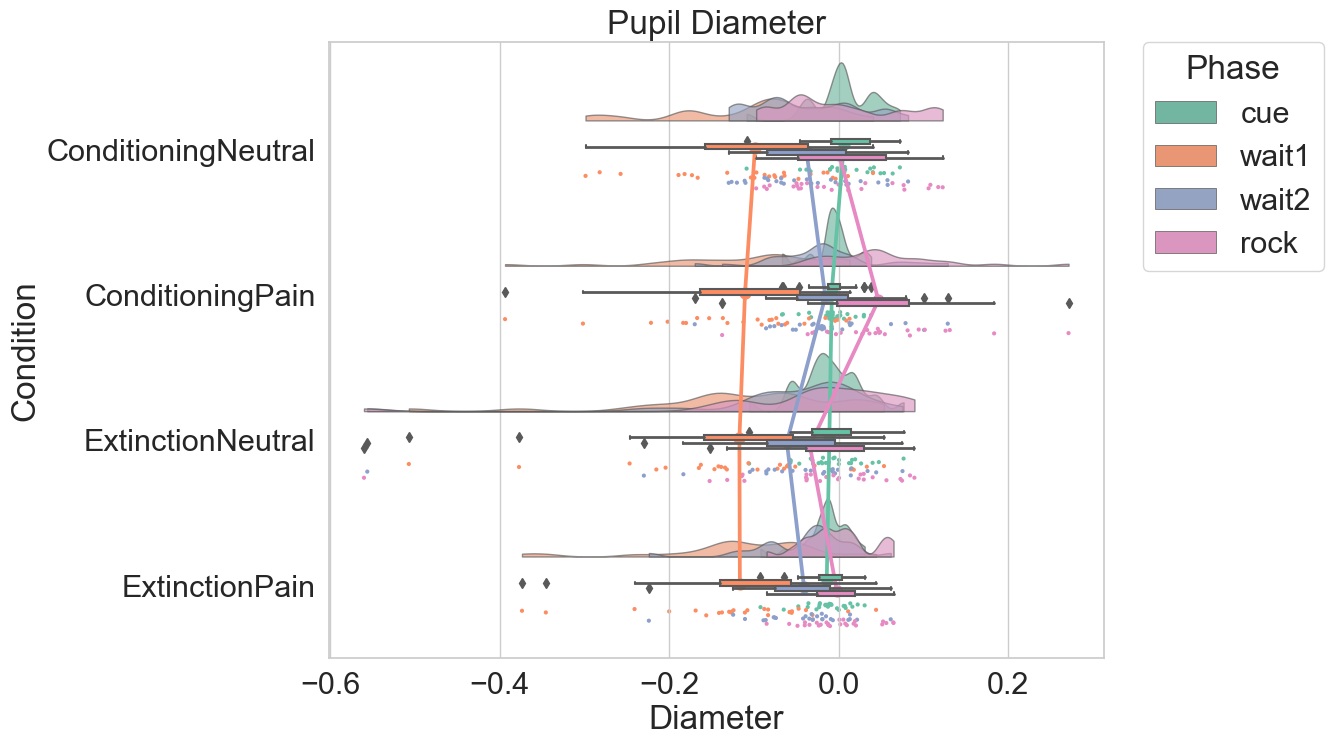

In [14]:
# Pupil Diameter Cond vs Extinction
df = pd.read_csv ("/Users/dhewitt/Data/pps/Exports/GrandAvExport_PupilDiameterLong.csv", sep= ",")

dx = "Condition"; dy = "Diameter"; dhue = "Phase"; ort = "h"
f, ax = plt.subplots(figsize=(10, 8))

ax=pt.RainCloud(x = dx, y = dy, hue = dhue, data = df, palette = pal, bw = sigma, width_viol = .8,
                order = ['ConditioningNeutral','ConditioningPain','ExtinctionNeutral','ExtinctionPain'],
                ax = ax, orient = ort , alpha = .65, dodge = True, pointplot = True, move = .2)

plt.title("Pupil Diameter")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP20.png', bbox_inches='tight')

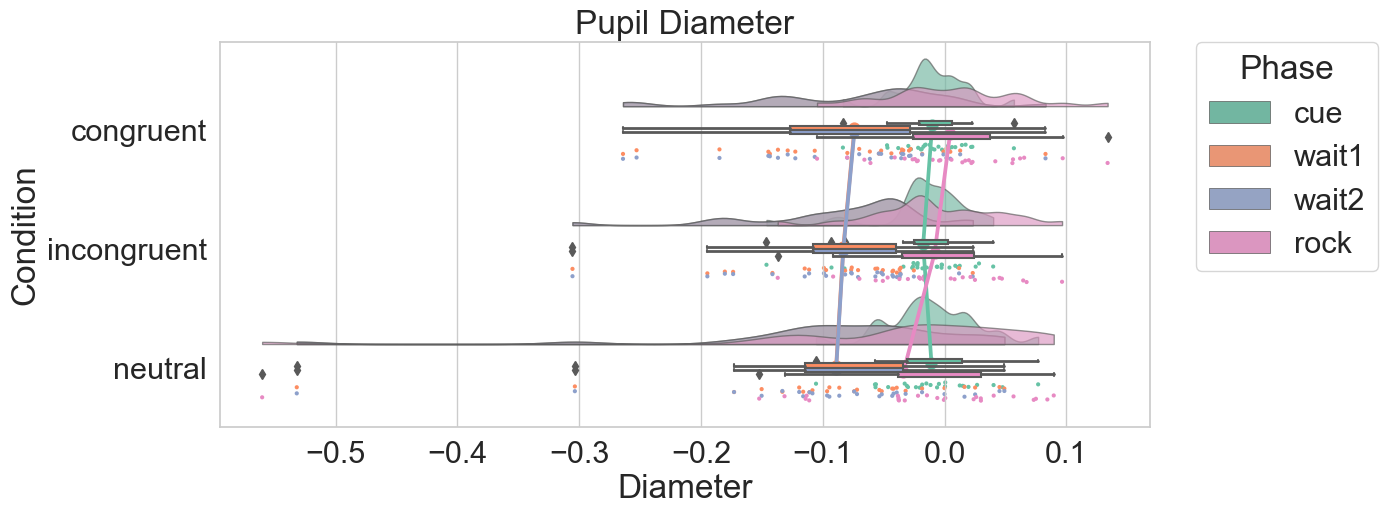

In [18]:
#Pupil diameter - extinction sides

df = pd.read_csv ("/Users/dhewitt/Data/pps/Exports/GrandAvExport_PupilDiameter_ExtinctionsidesLong.csv", sep= ",")

dx = "Condition"; dy = "Diameter"; dhue = "Phase"; ort = "h"
f, ax = plt.subplots(figsize=(12, 5))

ax=pt.RainCloud(x = dx, y = dy, hue = dhue, data = df, palette = pal, bw = sigma, width_viol = .8,
                ax = ax, orient = ort , alpha = .65, dodge = True, pointplot = True, move = .2)

plt.title("Pupil Diameter")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP20.png', bbox_inches='tight')

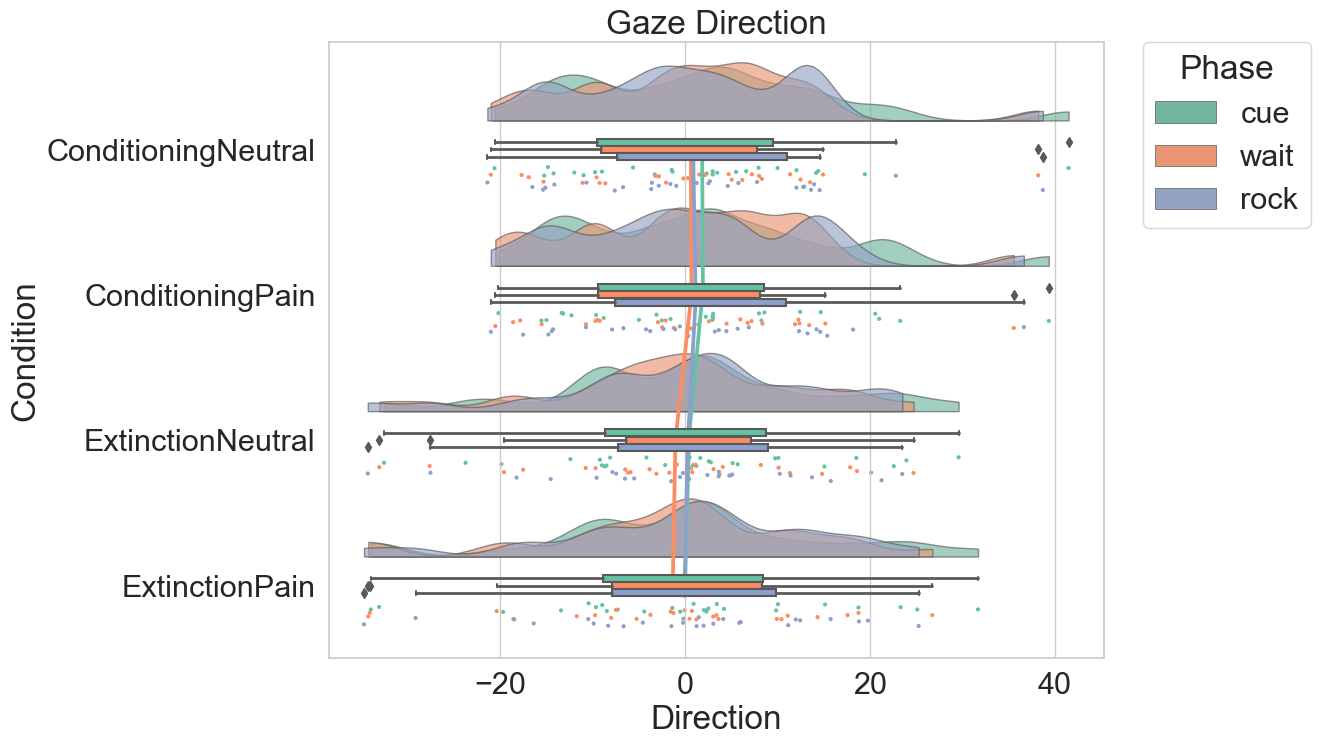

In [51]:
df = pd.read_csv ("/Users/dhewitt/Data/pps/Exports/GrandAvExport_GazeDirLong.csv", sep= ",")


# Gaze direction Cond vs Extinction
dx = "Condition"; dy = "Direction"; dhue = "Phase"; ort = "h"
f, ax = plt.subplots(figsize=(10, 8))

ax=pt.RainCloud(x = dx, y = dy, hue = dhue, data = df, palette = pal, bw = sigma, width_viol = .8,
                order = ['ConditioningNeutral','ConditioningPain','ExtinctionNeutral','ExtinctionPain'],
                ax = ax, orient = ort , alpha = .65, dodge = True, pointplot = True, move = .2)

plt.title("Gaze Direction")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP20.png', bbox_inches='tight')

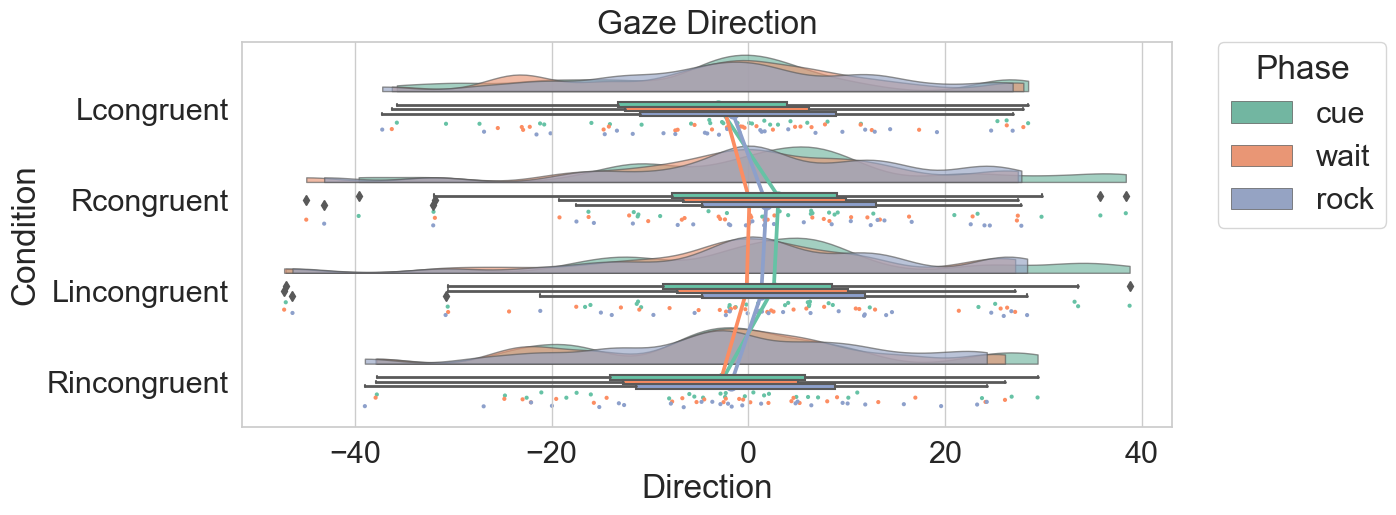

In [49]:
#Pupil diameter - extinction sides

df = pd.read_csv("/Users/dhewitt/Data/pps/Exports/GrandAvExport_GazeDir_ExtinctionsidesLong.csv", sep= ",")

dx = "Condition"; dy = "Direction"; dhue = "Phase"; ort = "h"
f, ax = plt.subplots(figsize=(12, 5))

ax=pt.RainCloud(x = dx, y = dy, hue = dhue, data = df, palette = pal, bw = sigma, width_viol = .8,
                ax = ax, orient = ort , alpha = .65, dodge = True, pointplot = True, move = .2)

plt.title("Gaze Direction")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP20.png', bbox_inches='tight')

That's it! Hopefully this tutorial has given you an idea of some of the different ways you can produce raincloud plots in Python.